In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [3]:
life_expectancy_clean = "resources/life_expectancy_clean.csv"

life_expectancy = pd.read_csv(life_expectancy_clean)

In [4]:
life_expectancy.head()

,Country,Year,Status,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),...,Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,26.3,6.2,0.01,71.28,65.0,115.4,...,6.0,8.16,65.0,0.01,584.26,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,27.1,6.4,0.01,73.52,62.0,49.2,...,58.0,8.18,62.0,0.01,612.70,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,26.8,6.6,0.01,73.22,64.0,43.0,...,62.0,8.13,64.0,0.01,631.74,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,27.2,6.9,0.01,78.18,67.0,278.7,...,67.0,8.52,67.0,0.01,669.96,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,27.5,7.1,0.01,7.10,68.0,301.3,...,68.0,7.87,68.0,0.01,63.54,2978599.0,18.2,18.2,0.454,9.5


In [5]:
life_expectancy.describe()

,Year,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),BMI,Under-5yo Deaths (%),Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
count,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2088.000000,2569.000000,2569.000000,2569.000000,2562.000000,2563.000000,2562.000000,2569.000000,2311.000000,2.114000e+03,2569.000000,2569.000000,2569.000000,2569.000000
mean,2007.016349,69.341845,16.218529,2.960802,4.538248,842.910930,80.903736,224.422849,38.234566,4.100662,82.845433,5.870773,82.742779,0.182935,7597.286058,1.290399e+07,4.903893,4.942156,0.627501,12.038926
std,4.332164,9.391106,12.404170,12.286989,4.011904,2105.196623,24.956422,1075.217547,19.767293,16.731129,22.945914,2.374245,23.195479,0.536235,14518.218860,6.298174e+07,4.505040,4.596621,0.210369,3.254761
min,2000.000000,36.300000,0.100000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.010000,1.680000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.700000,7.300000,0.000000,0.850000,18.930000,77.000000,0.000000,19.100000,0.000000,78.000000,4.260000,79.000000,0.010000,453.735000,1.880472e+05,1.600000,1.600000,0.494000,10.100000
50%,2007.000000,72.200000,14.200000,0.300000,3.760000,102.140000,92.000000,1.400000,43.800000,0.300000,93.000000,5.710000,93.000000,0.010000,1753.350000,1.345220e+06,3.300000,3.300000,0.677000,12.300000
75%,2011.000000,75.400000,22.300000,1.900000,7.530000,544.450000,97.000000,33.600000,55.800000,2.400000,97.000000,7.455000,97.000000,0.070000,5925.550000,7.268290e+06,7.300000,7.300000,0.779000,14.200000
max,2015.000000,89.000000,72.300000,180.000000,17.870000,19479.910000,99.000000,21218.300000,77.100000,250.000000,99.000000,14.390000,99.000000,5.060000,119172.740000,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
mean = life_expectancy.groupby('Country')["Life Expectancy"].mean()
median = life_expectancy.groupby('Country')["Life Expectancy"].median()
var = life_expectancy.groupby('Country')["Life Expectancy"].var()
std = life_expectancy.groupby('Country')["Life Expectancy"].std()
summary_statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var,"Standard Dev.": std})
summary_statistics.head()

,Mean,Median,Variance,Standard Dev.
Country,,,,
Afghanistan,58.193750,57.8,5.667292,2.380607
Albania,75.156250,75.6,3.373292,1.836652
Algeria,73.486667,73.8,2.284095,1.511322
Angola,48.793333,48.2,7.763524,2.786310
Antigua and Barbuda,74.966667,75.0,0.720952,0.849089


In [7]:
life_expectancy["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [8]:
developed_countries = life_expectancy.loc[life_expectancy["Status"] == "Developed",:]
developed_countries.head()

,Country,Year,Status,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),...,Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
107,Australia,2014,Developed,82.7,0.6,0.1,9.71,10769.36,91.0,34.0,...,92.0,9.42,92.0,0.01,62214.69,2346694.0,0.6,0.6,0.936,20.4
108,Australia,2013,Developed,82.5,6.1,0.1,9.87,11734.85,91.0,15.8,...,91.0,9.36,91.0,0.01,67792.34,23117353.0,0.6,0.6,0.933,20.3
109,Australia,2012,Developed,82.3,6.1,0.1,10.03,11715.00,91.0,19.9,...,92.0,9.36,92.0,0.01,67677.63,22728254.0,0.6,0.6,0.930,20.1
110,Australia,2011,Developed,82.0,6.3,0.1,10.30,10986.27,92.0,19.0,...,92.0,9.20,92.0,0.01,62245.13,223424.0,0.6,0.6,0.927,19.8
111,Australia,2010,Developed,81.9,6.4,0.1,10.52,8875.79,92.0,7.0,...,92.0,9.20,92.0,0.01,51874.85,223175.0,0.7,0.6,0.927,19.5


In [9]:
mean_life_expectancy_alcohol_developed = developed_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "Alcohol Consumpter per Capita (ltr)" : np.mean})                                                             

mean_life_expectancy_alcohol_developed.head()


,Country,Life Expectancy,Alcohol Consumpter per Capita (ltr)
0,Australia,81.746667,10.155333
1,Austria,81.480000,12.236000
2,Belgium,80.653333,11.042667
3,Bulgaria,72.740000,10.865333
4,Croatia,75.993333,12.448000


<IPython.core.display.Javascript object>


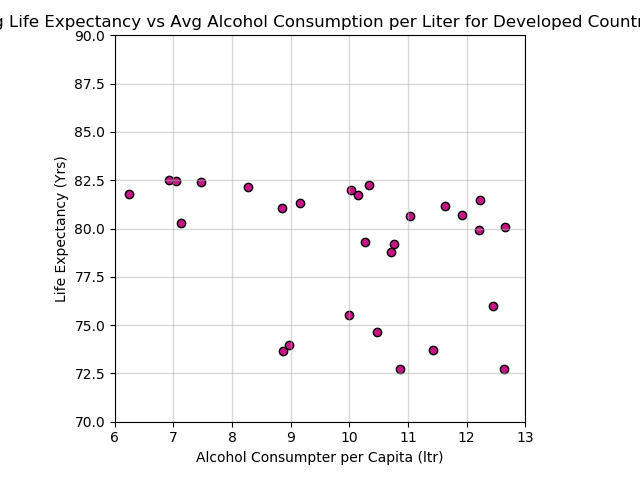

In [28]:
x = mean_life_expectancy_alcohol_developed["Alcohol Consumpter per Capita (ltr)"]
y = mean_life_expectancy_alcohol_developed["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumvioletred", edgecolor = "black")
plt.title("Avg Life Expectancy vs Avg Alcohol Consumption per Liter for Developed Countries")
plt.xlabel("Alcohol Consumpter per Capita (ltr)")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.ylim(70, 90)
plt.xlim(6,13)
plt.tight_layout()

In [11]:
mean_life_expectancy_bmi_developed = developed_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "BMI" : np.mean})                                                             

mean_life_expectancy_bmi_developed.head()

,Country,Life Expectancy,BMI
0,Australia,81.746667,55.146667
1,Austria,81.480000,47.666667
2,Belgium,80.653333,50.040000
3,Bulgaria,72.740000,53.753333
4,Croatia,75.993333,51.600000


<IPython.core.display.Javascript object>


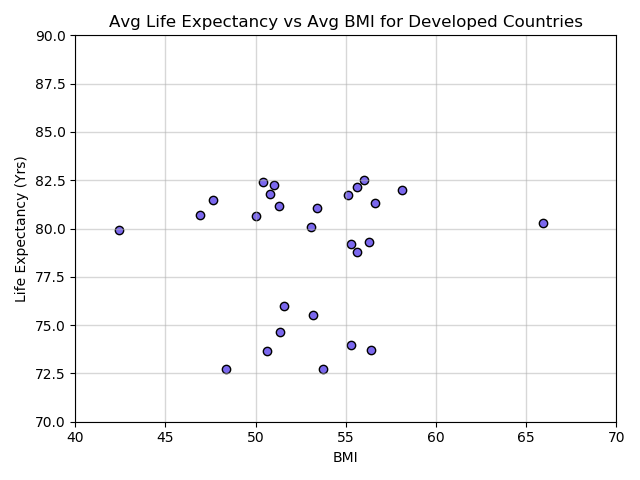

In [29]:
x = mean_life_expectancy_bmi_developed["BMI"]
y = mean_life_expectancy_bmi_developed["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Life Expectancy vs Avg BMI for Developed Countries")
plt.xlabel("BMI")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.ylim(70, 90)
plt.xlim(40,70)
plt.tight_layout()

In [13]:
developing_countries = life_expectancy.loc[life_expectancy["Status"] == "Developing",:]
developing_countries.head()

,Country,Year,Status,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),...,Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,26.3,6.2,0.01,71.28,65.0,115.4,...,6.0,8.16,65.0,0.01,584.26,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,27.1,6.4,0.01,73.52,62.0,49.2,...,58.0,8.18,62.0,0.01,612.70,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,26.8,6.6,0.01,73.22,64.0,43.0,...,62.0,8.13,64.0,0.01,631.74,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,27.2,6.9,0.01,78.18,67.0,278.7,...,67.0,8.52,67.0,0.01,669.96,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,27.5,7.1,0.01,7.10,68.0,301.3,...,68.0,7.87,68.0,0.01,63.54,2978599.0,18.2,18.2,0.454,9.5


In [14]:
developing_countries.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality (%)',
       'Infant Deaths (%)', 'Alcohol Consumpter per Capita (ltr)',
       'Percentage Expenditure', 'Hepatitis B Vaccines (%)',
       'Measles Cases (%)', 'BMI', 'Under-5yo Deaths (%)',
       'Polio Vaccines (%)', 'Total Expenditure (%)',
       'Diphtheria Vaccines (%)', 'HIV/AIDS Deaths Under 5yo (%)',
       'GDP Per Capita ($)', 'Population', 'Thinness  1-19 yrs',
       'Thinness 5-9 yrs', 'Income Composition of Resources', 'Schooling'],
      dtype='object')

In [15]:
mean_life_expectancy_alcohol_developing = developing_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "Alcohol Consumpter per Capita (ltr)" : np.mean})                                                             

mean_life_expectancy_alcohol_developing.head()


,Country,Life Expectancy,Alcohol Consumpter per Capita (ltr)
0,Afghanistan,58.193750,0.014375
1,Albania,75.156250,4.848750
2,Algeria,73.486667,0.406667
3,Angola,48.793333,5.740667
4,Antigua and Barbuda,74.966667,7.949333


<IPython.core.display.Javascript object>


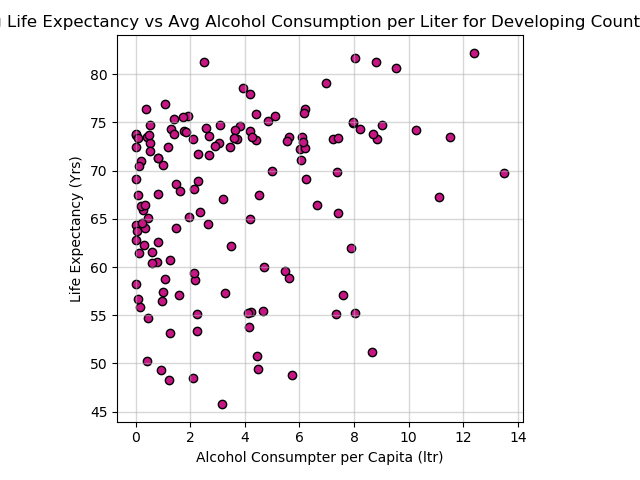

In [30]:
x = mean_life_expectancy_alcohol_developing["Alcohol Consumpter per Capita (ltr)"]
y = mean_life_expectancy_alcohol_developing["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumvioletred", edgecolor = "black")
plt.title("Avg Life Expectancy vs Avg Alcohol Consumption per Liter for Developing Countries")
plt.xlabel("Alcohol Consumpter per Capita (ltr)")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()

In [17]:
mean_life_expectancy_bmi_developing = developing_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "BMI" : np.mean})                                                             

mean_life_expectancy_bmi_developing.head()

,Country,Life Expectancy,BMI
0,Afghanistan,58.193750,15.518750
1,Albania,75.156250,49.068750
2,Algeria,73.486667,48.026667
3,Angola,48.793333,17.666667
4,Antigua and Barbuda,74.966667,37.806667


<IPython.core.display.Javascript object>


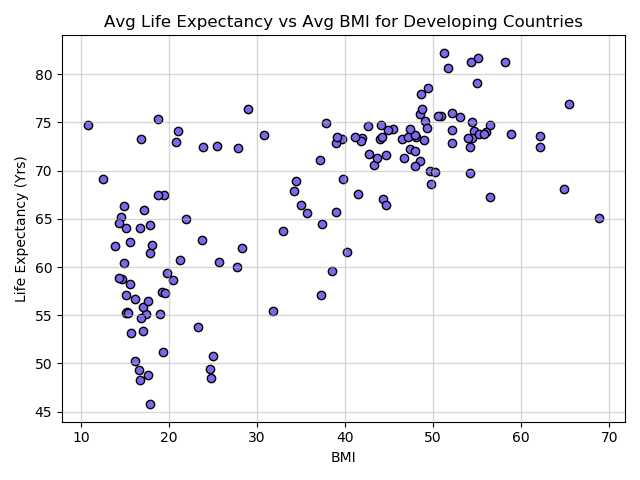

In [31]:
x = mean_life_expectancy_bmi_developing["BMI"]
y = mean_life_expectancy_bmi_developing["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Life Expectancy vs Avg BMI for Developing Countries")
plt.xlabel("BMI")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# plt.ylim(70, 90)
# plt.xlim(40,70)
plt.tight_layout()

<IPython.core.display.Javascript object>


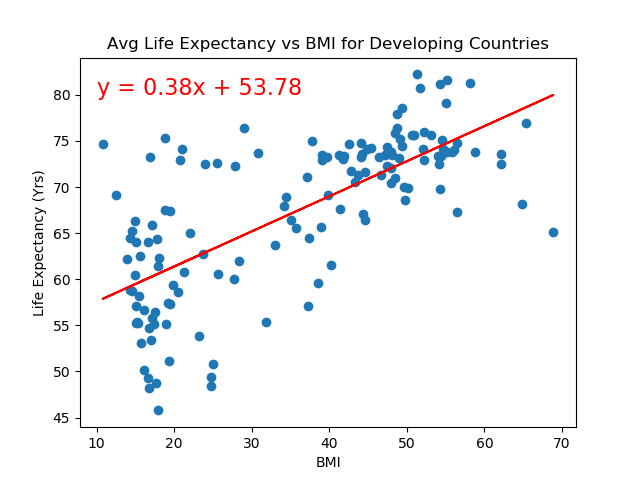

R squared: 0.49175086857304273


In [41]:
x_values = mean_life_expectancy_bmi_developing["BMI"]
y_values = mean_life_expectancy_bmi_developing["Life Expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,80),fontsize=16,color="red")
plt.ylabel('Life Expectancy (Yrs)')
plt.xlabel('BMI')
plt.title('Avg Life Expectancy vs BMI for Developing Countries')
print(f"R squared: {rvalue**2}")
plt.show()

In [19]:
mean_life_expectancy_dip_developing = developing_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "Diphtheria Vaccines (%)" : np.mean})                                                             

mean_life_expectancy_dip_developing.head()


,Country,Life Expectancy,Diphtheria Vaccines (%)
0,Afghanistan,58.193750,52.312500
1,Albania,75.156250,98.062500
2,Algeria,73.486667,91.666667
3,Angola,48.793333,46.600000
4,Antigua and Barbuda,74.966667,98.266667


<IPython.core.display.Javascript object>


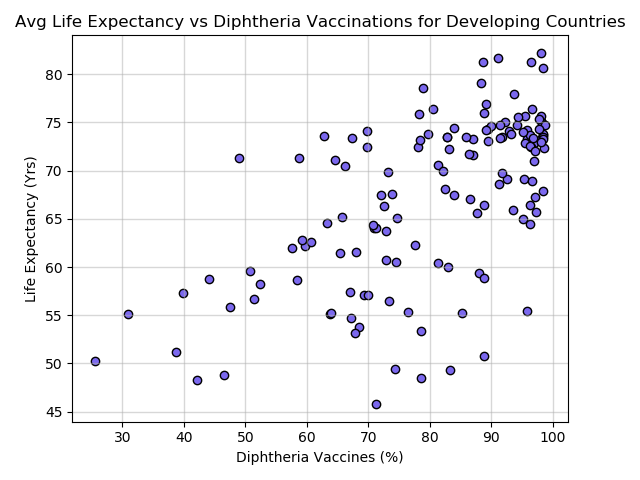

In [36]:
x = mean_life_expectancy_dip_developing["Diphtheria Vaccines (%)"]
y = mean_life_expectancy_dip_developing["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Life Expectancy vs Diphtheria Vaccinations for Developing Countries")
plt.xlabel("Diphtheria Vaccines (%)")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# plt.ylim(70, 90)
# plt.xlim(40,70)
plt.tight_layout()

<IPython.core.display.Javascript object>


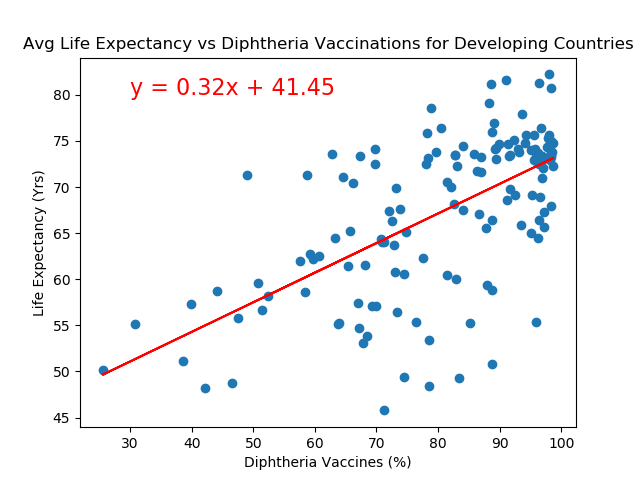

R squared: 0.3845846769715367


In [39]:
x_values = mean_life_expectancy_dip_developing["Diphtheria Vaccines (%)"]
y_values = mean_life_expectancy_dip_developing["Life Expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,80),fontsize=16,color="red")
plt.ylabel('Life Expectancy (Yrs)')
plt.xlabel('Diphtheria Vaccines (%)')
plt.title('Avg Life Expectancy vs Diphtheria Vaccinations for Developing Countries')
print(f"R squared: {rvalue**2}")
plt.show()

In [21]:
developing_countries.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality (%)',
       'Infant Deaths (%)', 'Alcohol Consumpter per Capita (ltr)',
       'Percentage Expenditure', 'Hepatitis B Vaccines (%)',
       'Measles Cases (%)', 'BMI', 'Under-5yo Deaths (%)',
       'Polio Vaccines (%)', 'Total Expenditure (%)',
       'Diphtheria Vaccines (%)', 'HIV/AIDS Deaths Under 5yo (%)',
       'GDP Per Capita ($)', 'Population', 'Thinness  1-19 yrs',
       'Thinness 5-9 yrs', 'Income Composition of Resources', 'Schooling'],
      dtype='object')

In [22]:
mean_life_expectancy_hepb_developing = developing_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "Hepatitis B Vaccines (%)" : np.mean})                                                             

mean_life_expectancy_hepb_developing.head()


,Country,Life Expectancy,Hepatitis B Vaccines (%)
0,Afghanistan,58.193750,64.562500
1,Albania,75.156250,98.000000
2,Algeria,73.486667,76.454545
3,Angola,48.793333,71.000000
4,Antigua and Barbuda,74.966667,98.214286


<IPython.core.display.Javascript object>


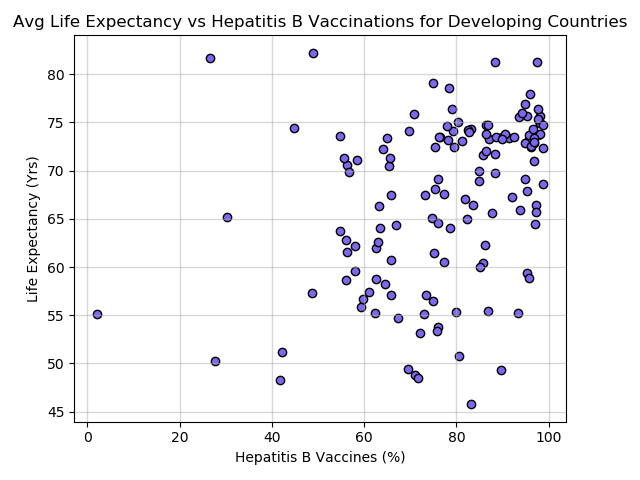

In [32]:
x = mean_life_expectancy_hepb_developing["Hepatitis B Vaccines (%)"]
y = mean_life_expectancy_hepb_developing["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Life Expectancy vs Hepatitis B Vaccinations for Developing Countries")
plt.xlabel("Hepatitis B Vaccines (%)")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()

In [25]:
mean_life_expectancy_polio_developing = developing_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "Polio Vaccines (%)" : np.mean})                                                             

mean_life_expectancy_polio_developing.head()


,Country,Life Expectancy,Polio Vaccines (%)
0,Afghanistan,58.193750,48.375000
1,Albania,75.156250,98.125000
2,Algeria,73.486667,91.533333
3,Angola,48.793333,48.733333
4,Antigua and Barbuda,74.966667,97.666667


<IPython.core.display.Javascript object>


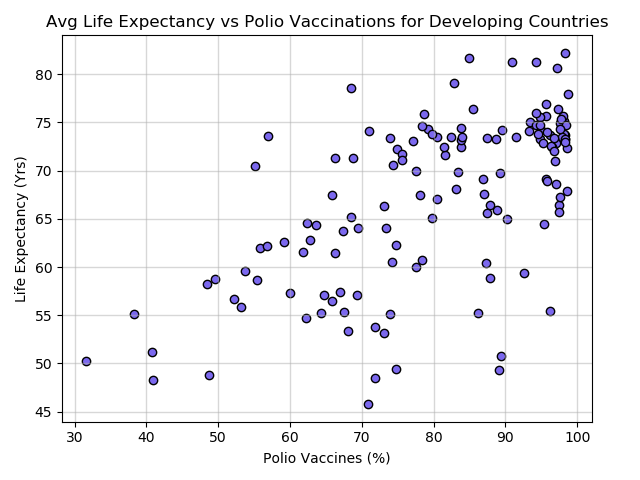

In [34]:
x = mean_life_expectancy_polio_developing["Polio Vaccines (%)"]
y = mean_life_expectancy_polio_developing["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Life Expectancy vs Polio Vaccinations for Developing Countries")
plt.xlabel("Polio Vaccines (%)")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()

***Need to run regressions and get correlation coefficients for polio, hep b, diphtheria and bmi against avg life expectancy***

<IPython.core.display.Javascript object>


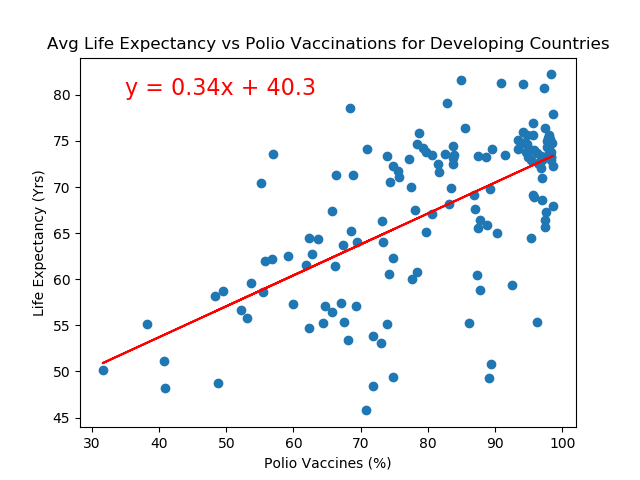

R squared: 0.38702727171440066


In [35]:
#polio regression

x_values = mean_life_expectancy_polio_developing["Polio Vaccines (%)"]
y_values = mean_life_expectancy_polio_developing["Life Expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,80),fontsize=16,color="red")
plt.ylabel('Life Expectancy (Yrs)')
plt.xlabel('Polio Vaccines (%)')
plt.title('Avg Life Expectancy vs Polio Vaccinations for Developing Countries')
print(f"R squared: {rvalue**2}")
plt.show()